In [1]:
pip install git+https://github.com/KindXiaoming/pykan.git

  Cloning https://github.com/KindXiaoming/pykan.git to /private/var/folders/d4/wqvbf1_n4xg7wd_b_nqkc9h00000gn/T/pip-req-build-do2cp566
  Running command git clone --filter=blob:none --quiet https://github.com/KindXiaoming/pykan.git /private/var/folders/d4/wqvbf1_n4xg7wd_b_nqkc9h00000gn/T/pip-req-build-do2cp566
  Resolved https://github.com/KindXiaoming/pykan.git to commit f6ac7e25ed4cd99aba2b9c883d1cf25f959f6ac4
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
import torch
from kan import KAN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv('/Users/chaitanyakakade/Desktop/Heart_disease/heart_statlog_cleveland_hungary_final.csv')

In [31]:
df.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [32]:
df['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [33]:
X = df[list(df.columns.drop("target"))[0:11]]
y = df["target"]

In [34]:
# Splitting data to train val test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Converting data to Torch tensor
train_input = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
train_label = torch.tensor(y_train.to_numpy(), dtype=torch.long)
val_input = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
val_label = torch.tensor(y_val.to_numpy(), dtype=torch.long)
test_input = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
test_label = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [35]:
len(df)

1190

In [36]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'val_input': val_input,
    'val_label': val_label,
    'test_input': test_input,
    'test_label': test_label
}

In [37]:
# Create model
model = KAN(width=[11,3,2], grid=30, k=3)


In [38]:
# Fuctions for getting accuracy scores while training
def train_acc():
    preds = torch.argmax(model(dataset['train_input']), dim=1)
    return torch.mean((preds == dataset['train_label']).float())

def test_acc():
    preds = torch.argmax(model(dataset['test_input']), dim=1)
    return torch.mean((preds == dataset['test_label']).float())

In [39]:
# KAN model training
results = model.train({'train_input': train_input, 'train_label': train_label, 'test_input': val_input, 'test_label': val_label},
                      metrics=(train_acc, test_acc),
                      opt="LBFGS", steps=300, loss_fn=torch.nn.CrossEntropyLoss()) 

train loss: 2.56e-01 | test loss: 7.16e-01 | reg: 3.93e+01 : 100%|█| 300/300 [01:42<00:00,  2.92it/s


In [25]:
# Predictions of train val and test datasets
test_preds = torch.argmax(model.forward(test_input).detach(),dim=1)
test_labels = test_label

train_preds = torch.argmax(model.forward(train_input).detach(),dim=1)
train_labels = train_label

val_preds = torch.argmax(model.forward(val_input).detach(),dim=1)
val_labels = val_label


# Evaluate metrics

print("Train ACC:", accuracy_score(train_labels.numpy(), train_preds.numpy()))

print("Val ACC:", accuracy_score(val_labels.numpy(), val_preds.numpy()))

print("Test ACC:", accuracy_score(test_labels.numpy(), test_preds.numpy()))

Train ACC: 0.9387755102040817
Val ACC: 0.9101123595505618
Test ACC: 0.8156424581005587


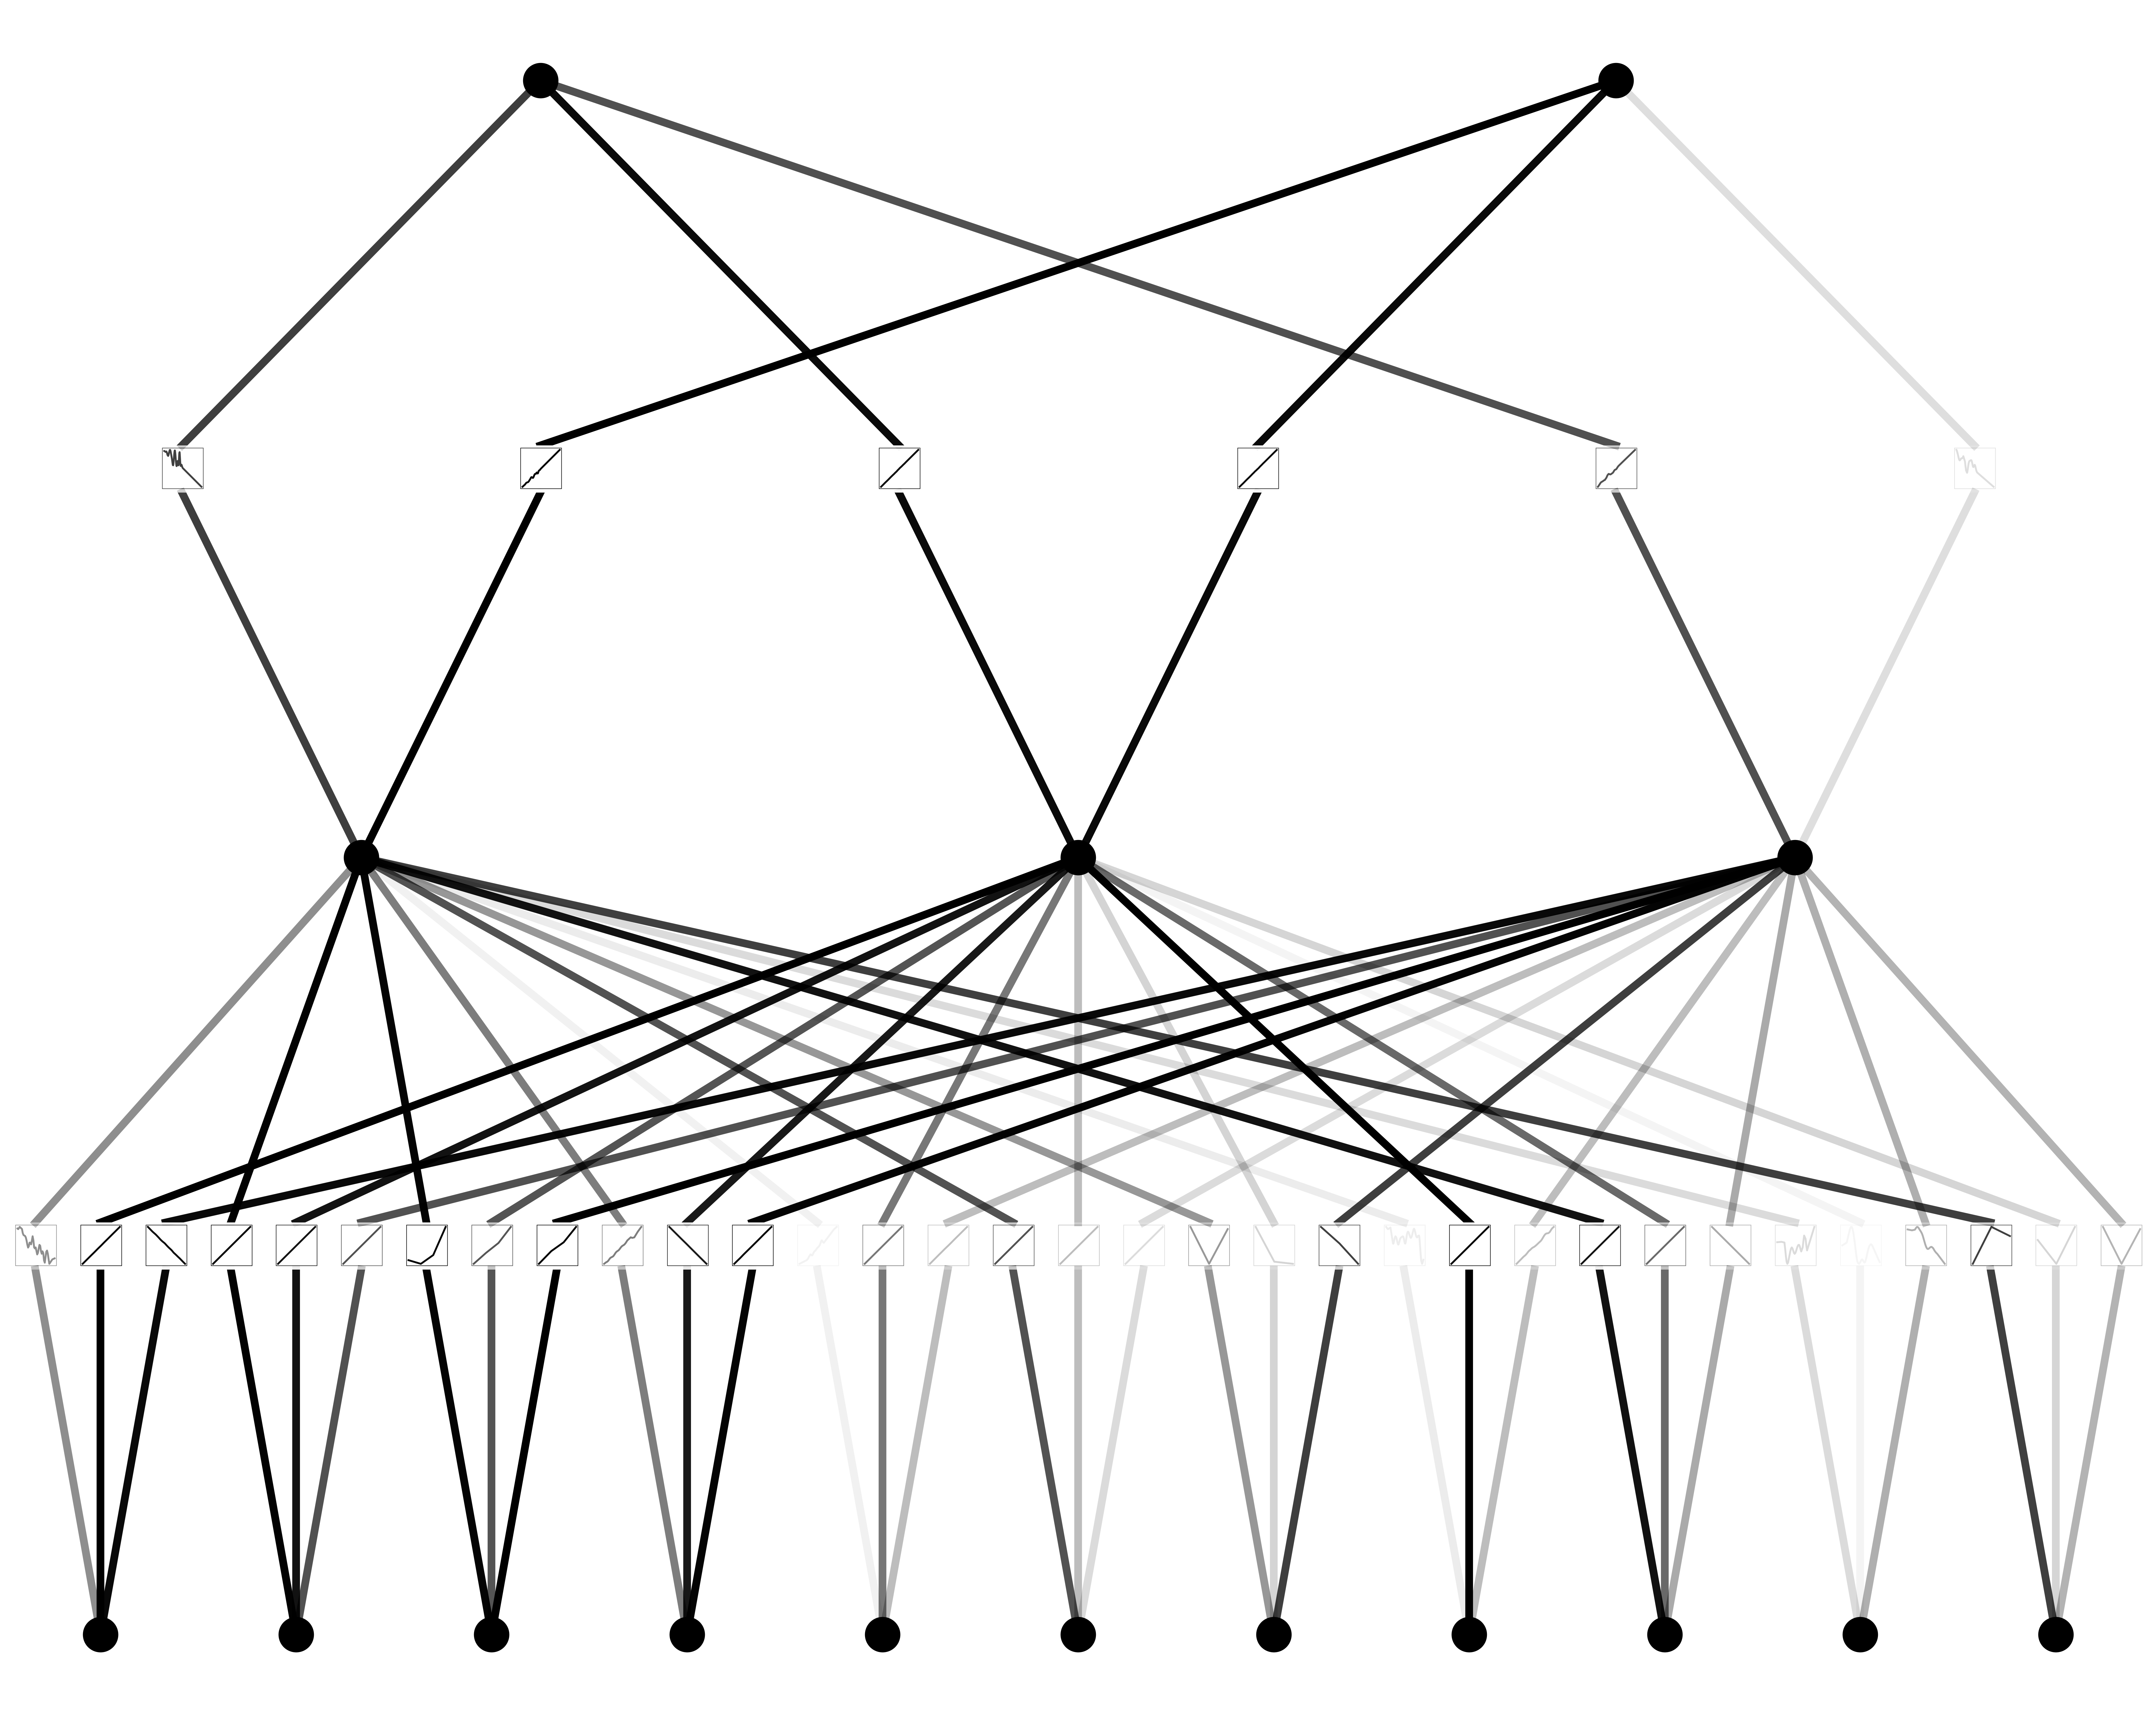

In [27]:
# Plotting KAN network
model.plot(scale=10)

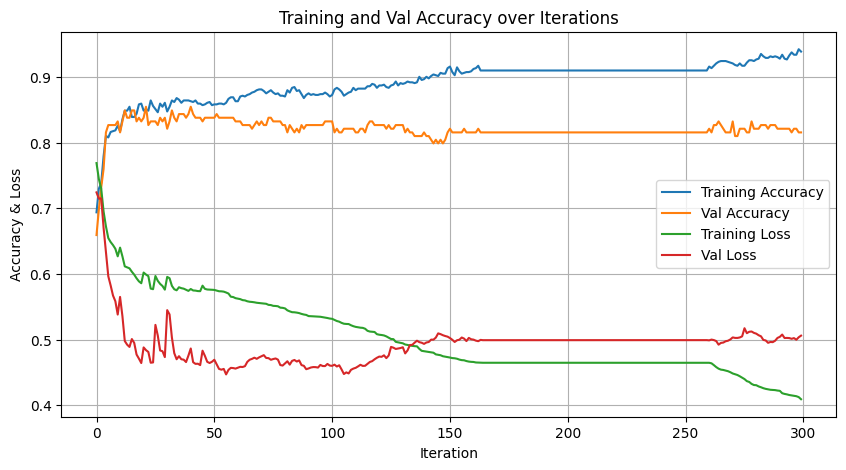

In [28]:
# Learning curve based on ACC and LOSS
plt.figure(figsize=(10, 5))
plt.plot(results["train_acc"], label='Training Accuracy')
plt.plot(results["test_acc"], label='Val Accuracy')
plt.plot(results["train_loss"], label='Training Loss')
plt.plot(results["test_loss"], label='Val Loss')
plt.title('Training and Val Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy & Loss')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
results2 = model2.train({'train_input': train_input, 'train_label': train_label, 'test_input': val_input, 'test_label': val_label},
                      metrics=(train_acc, test_acc),
                      opt="LBFGS", steps=100, loss_fn=torch.nn.CrossEntropyLoss()) 

train loss: nan | test loss: nan | reg: nan : 100%|███████████████| 100/100 [00:48<00:00,  2.05it/s]


In [37]:
# Predictions of train val and test datasets
test_preds = torch.argmax(model2.forward(test_input).detach(),dim=1)
test_labels = test_label

train_preds = torch.argmax(model2.forward(train_input).detach(),dim=1)
train_labels = train_label

val_preds = torch.argmax(model2.forward(val_input).detach(),dim=1)
val_labels = val_label


# Evaluate metrics

print("Train ACC:", accuracy_score(train_labels.numpy(), train_preds.numpy()))

print("Val ACC:", accuracy_score(val_labels.numpy(), val_preds.numpy()))

print("Test ACC:", accuracy_score(test_labels.numpy(), test_preds.numpy()))

Train ACC: 0.4801920768307323
Val ACC: 0.46629213483146065
Test ACC: 0.43575418994413406


In [19]:
# Plotting KAN network
model2.plot(scale=10)

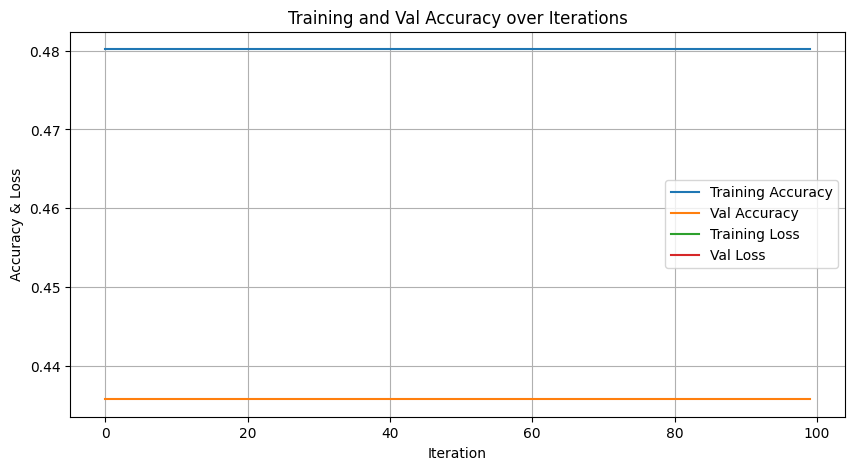

In [38]:
# Learning curve based on ACC and LOSS
plt.figure(figsize=(10, 5))
plt.plot(results2["train_acc"], label='Training Accuracy')
plt.plot(results2["test_acc"], label='Val Accuracy')
plt.plot(results2["train_loss"], label='Training Loss')
plt.plot(results2["test_loss"], label='Val Loss')
plt.title('Training and Val Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy & Loss')
plt.legend()
plt.grid(True)
plt.show()